In [1]:
import numpy as np
from prettytable import PrettyTable 
from IPython.display import Image

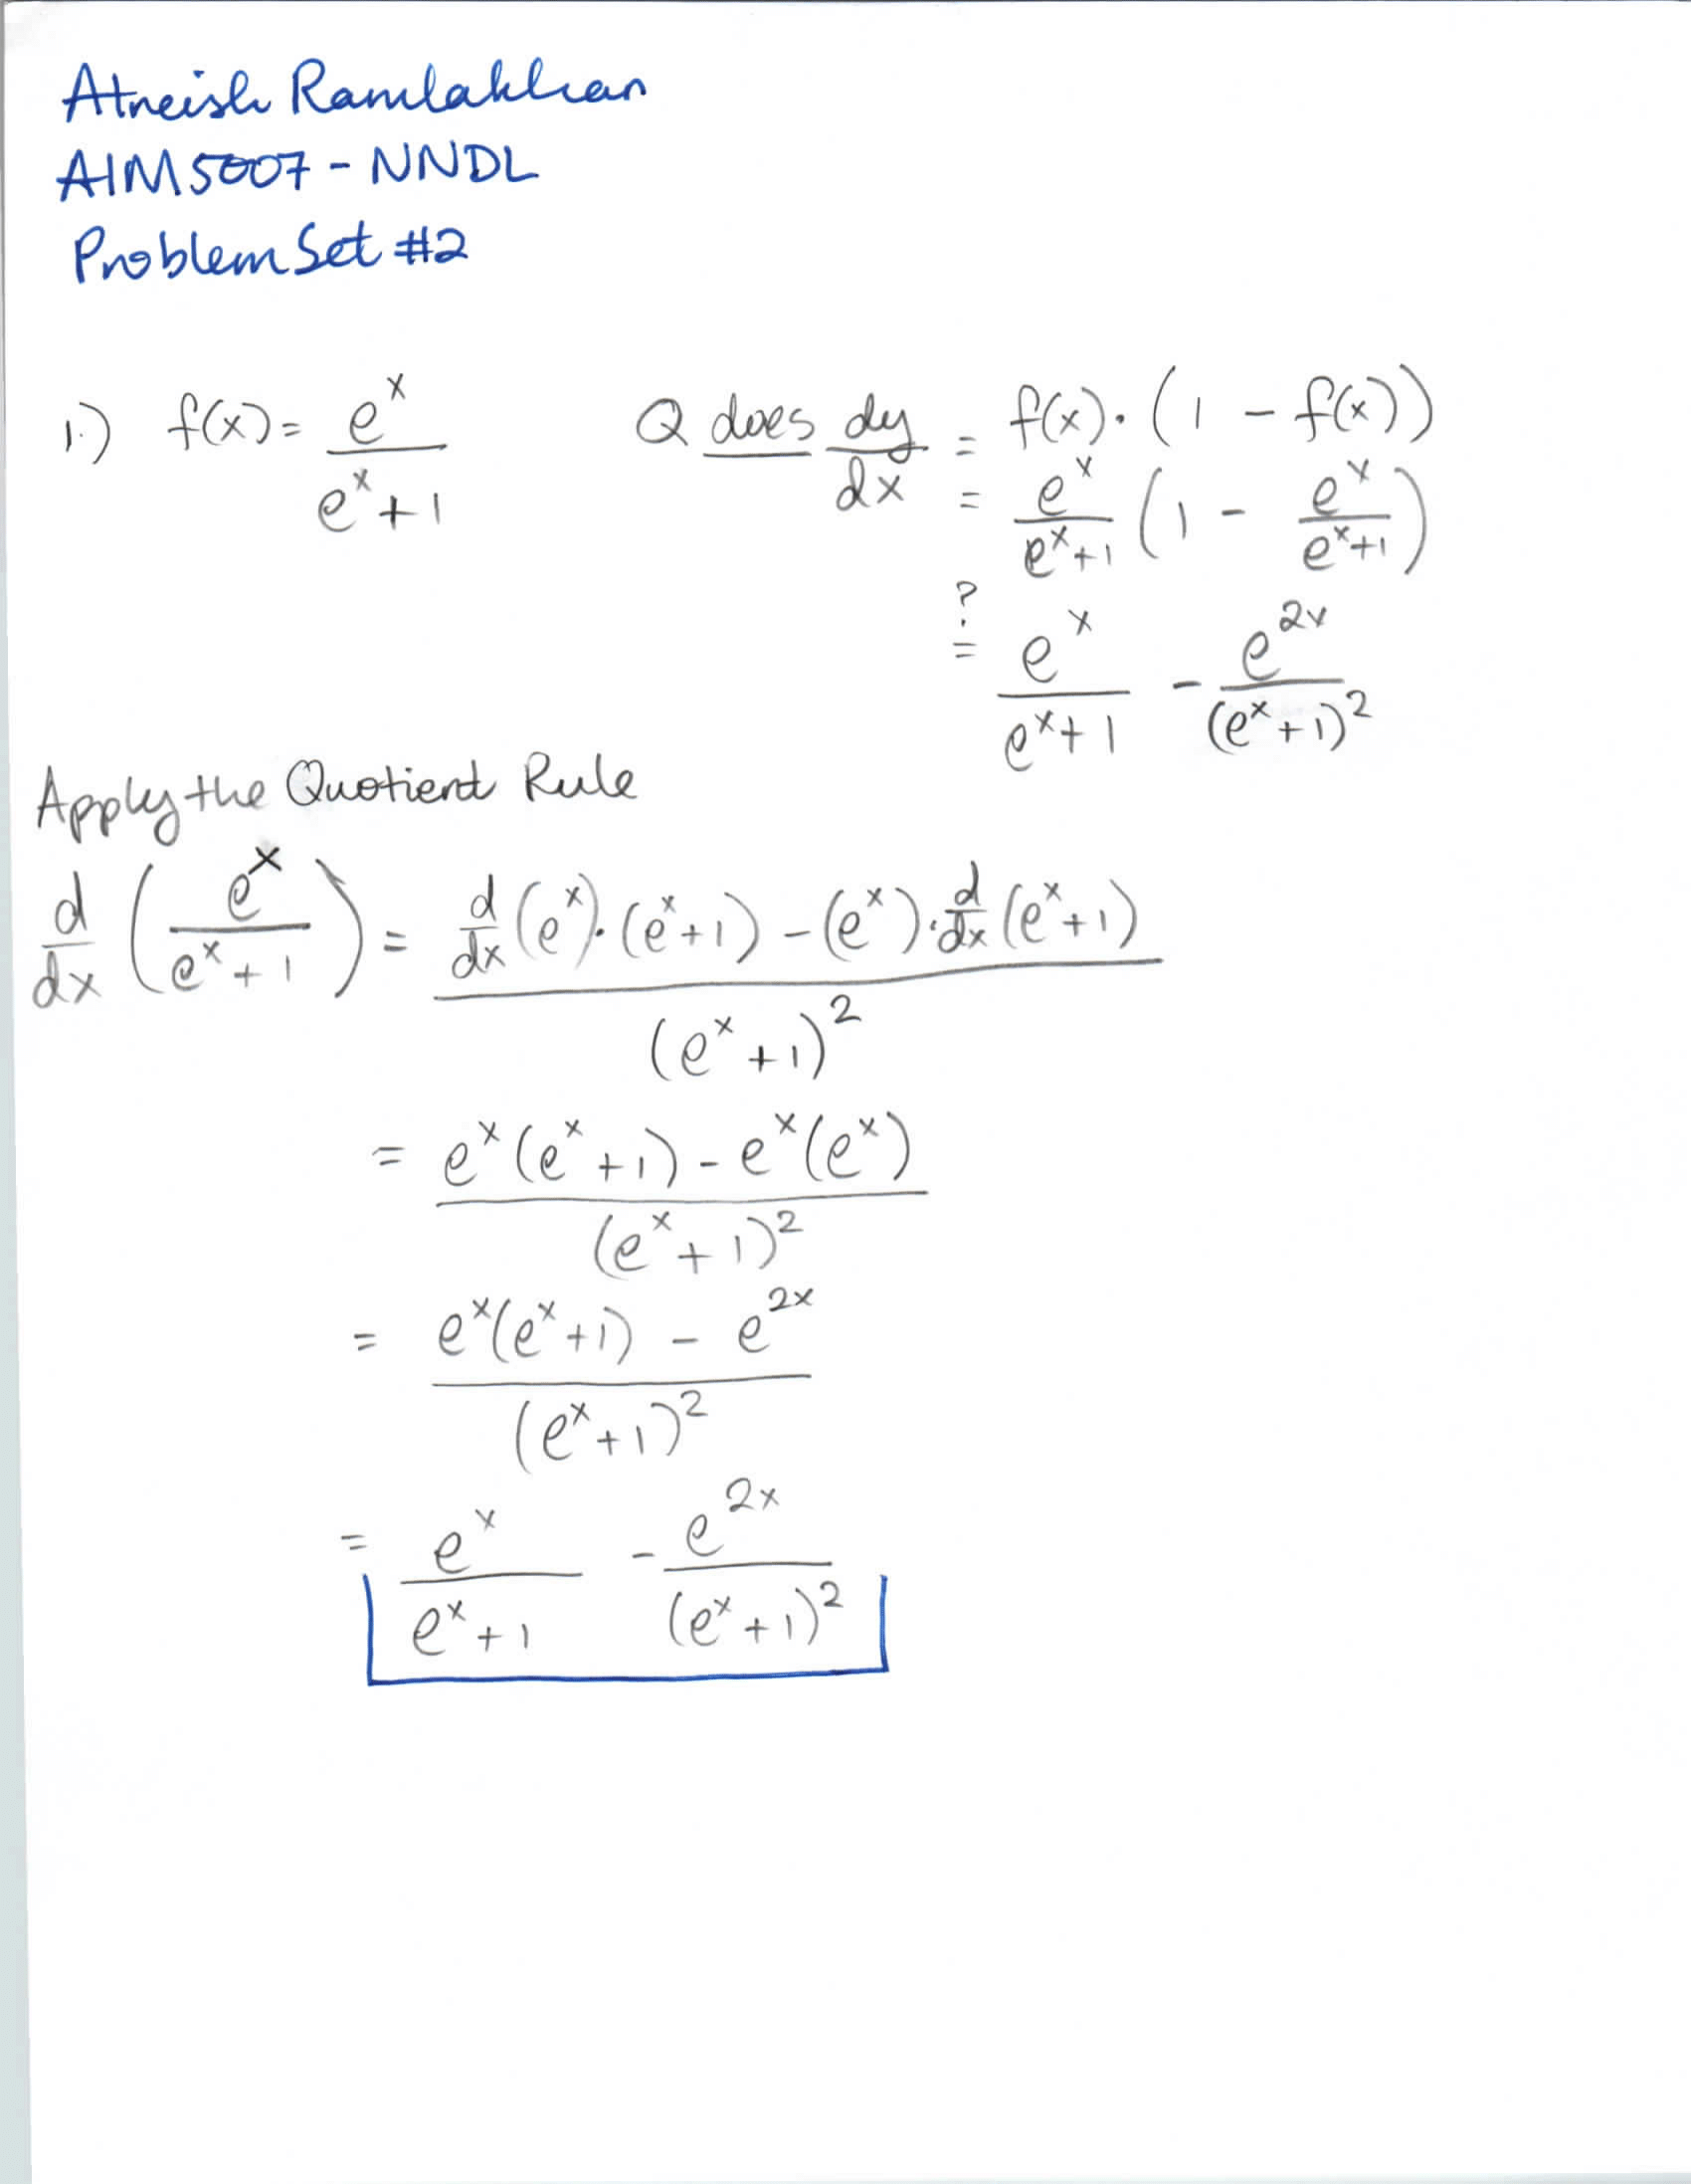

In [2]:
Image("1.png",width=600, height=800)

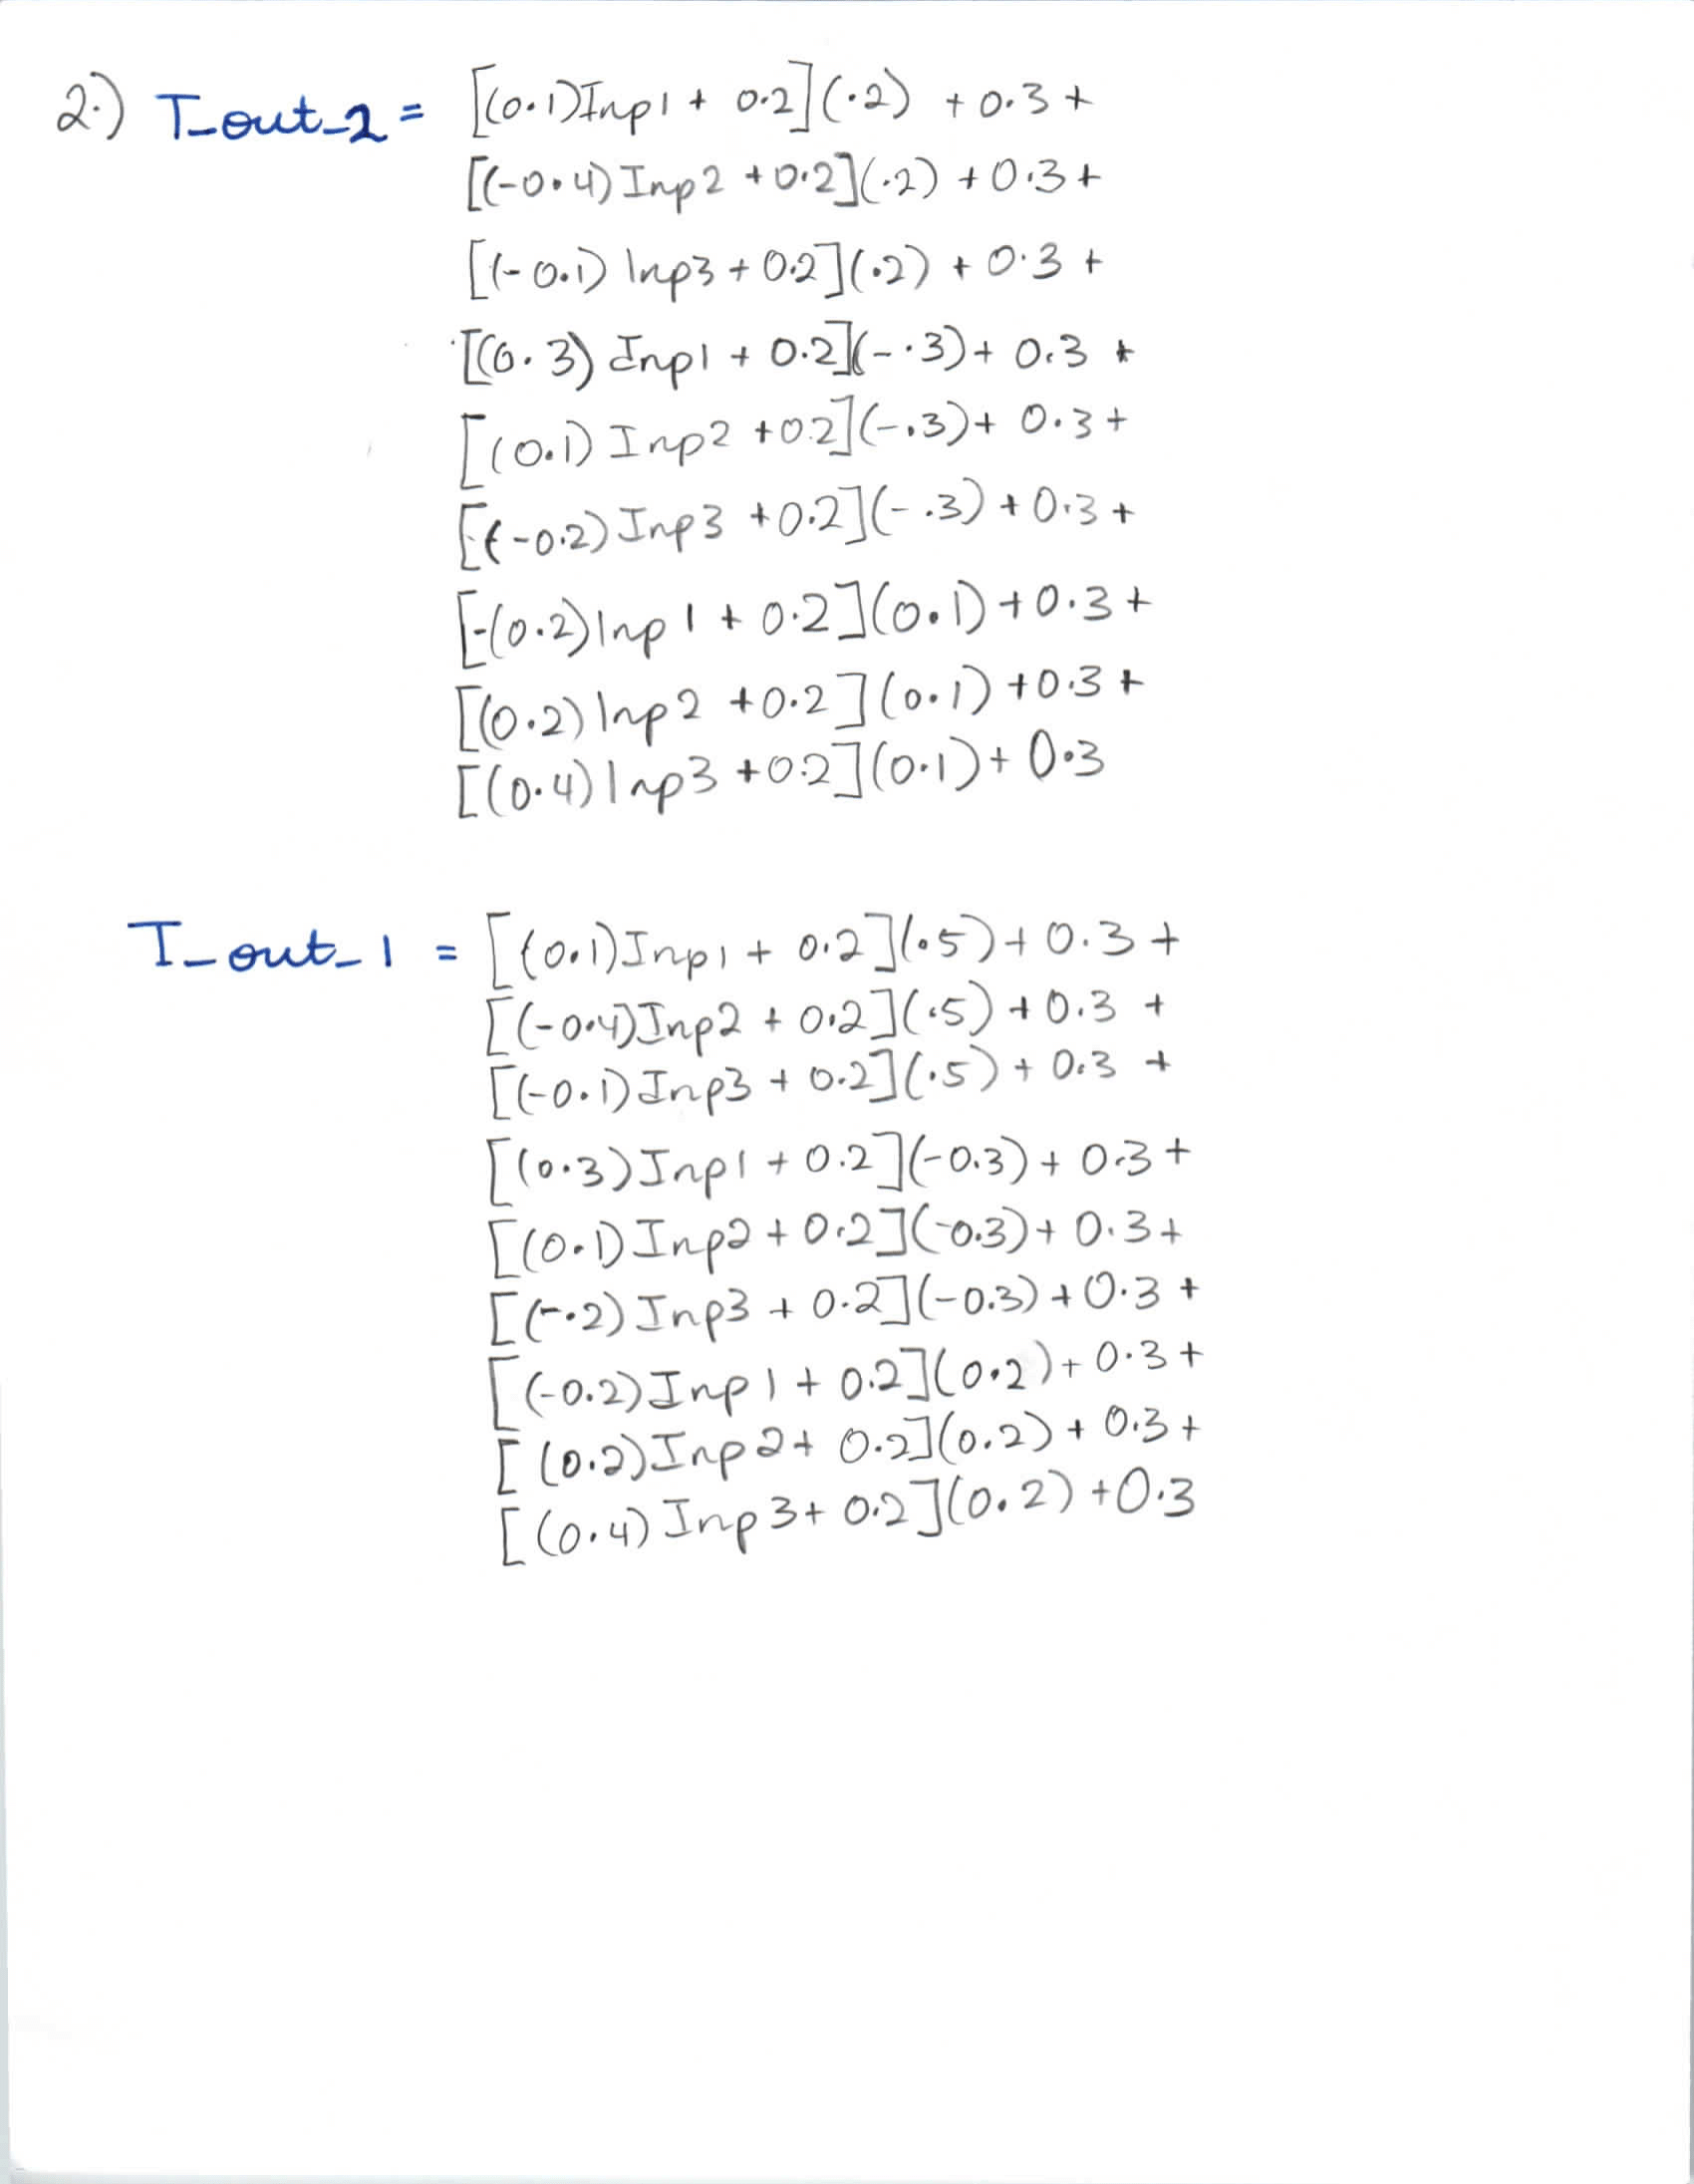

In [3]:
Image("2.png",width=600, height=800)

<b> 3. 
    A.  Forward Propogation  <b/>    

In [4]:
imput_layer = np.array([[4,8,6]])
target_layer = np.array([[.65,.4]])
bias_hiddenlayer = .2
bias_outputlayer = .3
weights_hidden = np.array([[.1,.3,-.2],[-.4,.1,.2],[-.1,-.2,.4]])
weights_output = np.array([[.5,.2],[-.3,-.3],[.2,.1]])
hidden_layer = np.dot(imput_layer,weights_hidden) + bias_hiddenlayer
output_layer = np.dot(hidden_layer,weights_output)+ bias_outputlayer

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

transformed_output = []
for i in output_layer:
    transformed_output.append(sigmoid(i))
    transformed_output = np.asarray(transformed_output).flatten()
    
print('The Hidden Layer is: {}'.format(hidden_layer.flatten()))
print('\nThe Output Layer is: {}'.format(output_layer.flatten()))
print('\nThe Transformed Output is: {}'.format(transformed_output))

The Hidden Layer is: [-3.2  1.   3.4]

The Output Layer is: [-0.92 -0.3 ]

The Transformed Output is: [0.28495789 0.42555748]


<b> B. Determine the Error  <b/> 

In [6]:
Error = .5*(np.linalg.norm(transformed_output-target_layer)**2)/len(transformed_output)
print('The Error is: {:.4f}'.format(Error))

The Error is: 0.0335


<b> C.  Calculate the Gradients  <b/> 

```1. Show that for the weights from hidden to output nodes, the gradient is given by: 
𝑔(𝐸,𝑊)=(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑇h𝑖𝑑𝑗```

In [7]:
grad_hid1_out1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*hidden_layer[:,0]
grad_hid2_out1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*hidden_layer[:,1]
grad_hid3_out1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*hidden_layer[:,2]
grad_hid1_out2 = (output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*hidden_layer[:,0]
grad_hid2_out2 = (output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*hidden_layer[:,1]
grad_hid3_out2 = (output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*hidden_layer[:,2]

Hidden_to_output_gradients = np.asarray([grad_hid1_out1,grad_hid1_out2,grad_hid2_out1,grad_hid2_out2,
                              grad_hid3_out1,grad_hid3_out2]).flatten()
print(Hidden_to_output_gradients)

[-8.8743936 -0.8736     2.773248   0.273      9.4290432  0.9282   ]


```2. Show that for the bias term for the output nodes, the gradient is given by:
𝑔(𝐸,𝑏𝑖𝑎𝑠𝑂) = ∑𝑘 [(𝑇𝑜𝑢𝑡𝑘 − 𝑡𝑎𝑟𝑔𝑘) ∙ 𝑇𝑜𝑢𝑡𝑘 ∙ (1 − 𝑇𝑜𝑢𝑡𝑘)].```

In [8]:
for i in range(len(output_layer)):
    bias1 = sum(output_layer[:,i]-target_layer[:,i])*output_layer[:,i]*(1-output_layer[:,i])
    print(bias1.tolist()[0])

2.7732479999999993


```3. Show that for the weights from input to hidden nodes, the gradient is given by:
𝑔(𝐸,𝑤) = ∑ [(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊 ]∙𝑇h𝑖𝑑𝑗∙(1−𝑇h𝑖𝑑𝑗)∙𝑖𝑛𝑝𝑖 ```

In [9]:
grad_imp1_hid1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[0,0]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,0]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[0,1]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,0]
grad_imp1_hid2 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[1,0]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,0]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[1,1]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,0]
grad_imp1_hid3 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[2,0]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,0]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[2,1]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,0]
grad_imp2_hid1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[0,0]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,1]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[0,1]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,1]
grad_imp2_hid2 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[1,0]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,1]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[1,1]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,1]
grad_imp2_hid3 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[2,0]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,1]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[2,1]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,1]
grad_imp3_hid1 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[0,0]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,2]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[0,1]*hidden_layer[:,0]*1-hidden_layer[:,0]*imput_layer[:,2]
grad_imp3_hid2 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[1,0]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,2]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[1,1]*hidden_layer[:,1]*1-hidden_layer[:,1]*imput_layer[:,2]
grad_imp3_hid3 = (output_layer[:,0]-target_layer[:,0])*output_layer[:,0]*(1-output_layer[:,0])*weights_output[2,0]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,2]+(output_layer[:,1]-target_layer[:,1])*output_layer[:,1]*(1-output_layer[:,1])*weights_output[2,1]*hidden_layer[:,2]*1-hidden_layer[:,2]*imput_layer[:,2]

imput_to_hidden_gradients = np.asarray([grad_imp1_hid1,grad_imp1_hid2,grad_imp1_hid3,
                                        grad_imp2_hid1,grad_imp2_hid2,grad_imp2_hid3,
                                        grad_imp3_hid1,grad_imp3_hid2,grad_imp3_hid3]).flatten()
print(imput_to_hidden_gradients)

[ 20.9880832   -8.9138744  -25.22137136  46.5880832  -16.9138744
 -52.42137136  33.7880832  -12.9138744  -38.82137136]


```4. Show that for the bias term for the hidden nodes, the gradient is given by:
𝑔(𝐸,𝑏𝑖𝑎𝑠𝐻) = ∑[(𝑇𝑜𝑢𝑡𝑘−𝑡𝑎𝑟𝑔𝑘)∙𝑇𝑜𝑢𝑡𝑘∙(1−𝑇𝑜𝑢𝑡𝑘)∙𝑊 ]∙𝑇h𝑖𝑑𝑗∙(1−𝑇h𝑖𝑑𝑗)```

In [10]:
K = len(output_layer)
J = len(hidden_layer)

for k in range(K):
    for j in range(J):
        bias2 = sum((output_layer[:,i]-target_layer[:,i])*output_layer[:,i]*(1-output_layer[:,i]*weights_output[j,k]*hidden_layer[:,j]*(1-hidden_layer[:,j])))
        print(bias2)

-7.485458559999999


<b>Table</b> 

In [11]:
table1_columns = ['Link from Node','Link to Node','Gradient']
Link_from_node = ['Imput1','Imput1','Imput1','Imput2','Imput2','Imput2','Imput3','Imput3','Imput3',
                  'Hidden1','Hidden1','Hidden2','Hidden2','Hidden3','Hidden3']
Link_to_node = ['Hidden1','Hidden2','Hidden3','Hidden1','Hidden2','Hidden3','Hidden1','Hidden2','Hidden3',
               'Out1','Out2','Out1','Out2','Out1','Out2']

Gradients = imput_to_hidden_gradients.tolist() + Hidden_to_output_gradients.tolist()
myTable = PrettyTable()

myTable.add_column(table1_columns[0], Link_from_node)
myTable.add_column(table1_columns[1], Link_to_node)
myTable.add_column(table1_columns[2], Gradients)
print(myTable)

table2_columns = ['Layer','Bias']
layers = ['Hidden','Output']
bias = [bias1[0],bias2]
myTable1 = PrettyTable()
myTable1.add_column(table2_columns[0], layers)
myTable1.add_column(table2_columns[1], bias)
print(myTable1)

+----------------+--------------+---------------------+
| Link from Node | Link to Node |       Gradient      |
+----------------+--------------+---------------------+
|     Imput1     |   Hidden1    |  20.988083200000002 |
|     Imput1     |   Hidden2    |  -8.913874400000001 |
|     Imput1     |   Hidden3    | -25.221371360000003 |
|     Imput2     |   Hidden1    |      46.5880832     |
|     Imput2     |   Hidden2    | -16.913874399999997 |
|     Imput2     |   Hidden3    |  -52.42137136000001 |
|     Imput3     |   Hidden1    |      33.7880832     |
|     Imput3     |   Hidden2    | -12.913874400000001 |
|     Imput3     |   Hidden3    |     -38.82137136    |
|    Hidden1     |     Out1     |  -8.874393599999998 |
|    Hidden1     |     Out2     | -0.8736000000000006 |
|    Hidden2     |     Out1     |  2.7732479999999993 |
|    Hidden2     |     Out2     |  0.2730000000000002 |
|    Hidden3     |     Out1     |  9.429043199999999  |
|    Hidden3     |     Out2     |  0.92820000000

<b> D.  Update the Weights  <b/> 

In [12]:
lr = 0.2
updated_weights_imput2hidden = weights_hidden.flatten() - lr*np.asarray(Gradients[:9])
updated_weights_hidden2output = weights_output.flatten() - lr*np.asarray(Gradients[9:15])
updated_weights = updated_weights_imput2hidden.tolist() + updated_weights_hidden2output.tolist()

original_bias = [bias_hiddenlayer,bias_outputlayer]
updated_bias = original_bias - lr*np.asarray(bias)

In [13]:
table1_columns = ['Link from Node','Link to Node','Updated Weights']
Link_from_node = ['Imput1','Imput1','Imput1','Imput2','Imput2','Imput2','Imput3','Imput3','Imput3',
                  'Hidden1','Hidden1','Hidden2','Hidden2','Hidden3','Hidden3']
Link_to_node = ['Hidden1','Hidden2','Hidden3','Hidden1','Hidden2','Hidden3','Hidden1','Hidden2','Hidden3',
               'Out1','Out2','Out1','Out2','Out1','Out2']
myTable3 = PrettyTable()
myTable3.add_column(table1_columns[0], Link_from_node)
myTable3.add_column(table1_columns[1], Link_to_node)
myTable3.add_column(table1_columns[2], updated_weights)
print(myTable3)

table2_columns = ['Layer','Updated Bias']
layers = ['Hidden','Output']
myTable4 = PrettyTable()
myTable4.add_column(table2_columns[0], layers)
myTable4.add_column(table2_columns[1], updated_bias)
print(myTable4)

+----------------+--------------+----------------------+
| Link from Node | Link to Node |   Updated Weights    |
+----------------+--------------+----------------------+
|     Imput1     |   Hidden1    |  -4.097616640000001  |
|     Imput1     |   Hidden2    |      2.08277488      |
|     Imput1     |   Hidden3    |  4.844274272000001   |
|     Imput2     |   Hidden1    |  -9.717616640000001  |
|     Imput2     |   Hidden2    |  3.4827748799999996  |
|     Imput2     |   Hidden3    |  10.684274272000001  |
|     Imput3     |   Hidden1    |  -6.857616640000001  |
|     Imput3     |   Hidden2    |  2.3827748800000004  |
|     Imput3     |   Hidden3    |     8.164274272      |
|    Hidden1     |     Out1     |  2.2748787199999994  |
|    Hidden1     |     Out2     | 0.37472000000000016  |
|    Hidden2     |     Out1     | -0.8546495999999999  |
|    Hidden2     |     Out2     |       -0.3546        |
|    Hidden3     |     Out1     | -1.6858086399999999  |
|    Hidden3     |     Out2    


<b> Part A Redux: Forward Propagation <b/>

In [14]:
updated_weights_imput2hidden = np.asarray(updated_weights[:9]).reshape(3,3)
updated_weights_hidden2output = np.asarray(updated_weights[9:15]).reshape(3,2)

hidden_layer1 = np.dot(imput_layer,updated_weights_imput2hidden) + updated_bias[0]
output_layer1 = np.dot(hidden_layer1,updated_weights_hidden2output)+ updated_bias[1]

transformed_output1 = []
for i in output_layer1:
    transformed_output1.append(sigmoid(i))
    transformed_output1 = np.asarray(transformed_output1).flatten()
    
print('The Updated Hidden Layer is: {}'.format(hidden_layer1.flatten()))
print('\nThe Updated Output Layer is: {}'.format(output_layer1.flatten()))
print('\nThe Updated Transformed Output is: {}'.format(transformed_output1))

The Updated Hidden Layer is: [-135.63174912   50.13529824  153.4822873 ]

The Updated Output Layer is: [-608.33856671  -79.94903716]

The Updated Transformed Output is: [6.33749087e-265 1.89921586e-035]


<b> Part B Redux: Determine the Error <b/>

In [15]:
Error1 = .5*(np.linalg.norm(transformed_output1-target_layer)**2)/len(transformed_output1)

print('The Updated Error is: {:.4f}'.format(Error1))
print('\nThis is a difference of {:.4f} in the Error after 1 Epoch'.format(abs(Error-Error1)))

The Updated Error is: 0.1456

This is a difference of 0.1121 in the Error after 1 Epoch
